In [ ]:
## 

In [1]:
# Loading data set using pandas.
!pip install pandas

import pandas as pd

file= "C:/Users/shakkerar/Downloads/un-general-debates-blueprint.csv"
df = pd.read_csv(file)
df.head(10)

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


In [3]:
!pip install nltk

import nltk
import pandas as pd

#nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

# Specify the file path
file_path = "C:/Users/shakkerar/Downloads/un-general-debates-blueprint.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
print(df.head())  

{'he', "won't", "couldn't", "haven't", 'up', 'hers', "mustn't", 'same', 'whom', 'only', 'at', 'any', 'these', 'don', 'hasn', "isn't", 'of', 'did', 'theirs', 'you', 'all', 'until', 'further', 'am', "it's", "you've", 'there', 'some', 'yours', 'yourselves', 'themselves', 'down', "should've", 'which', 'below', 'once', 'himself', 'very', 'its', 'than', 'in', 'we', 'who', 'couldn', 'y', 'been', "that'll", 'our', "she's", 'have', 'being', "mightn't", "needn't", 'doing', 's', 'after', 'needn', 'not', 'most', 'and', 'against', 'each', 'their', 'this', 'too', "shouldn't", "wasn't", 'are', 'before', 'myself', 'by', 'ain', 'ma', 'it', 'her', 'because', 'when', 'yourself', 'him', 'then', "don't", 'off', 'own', 'those', 'between', "hadn't", "wouldn't", 'do', 'both', 're', 'an', 'she', 'into', 'few', 'does', 'm', 'over', "weren't", 'as', "didn't", 'they', 'about', 'was', 'won', 'wasn', 'itself', 'nor', "you'd", 'mustn', 'now', 'or', 'can', 'o', 'should', 'shan', 'your', 'were', 'for', 'to', 'with', '

In [ ]:
## Removing Stopwords

In [4]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords
#nltk.download('stopwords')

# Load the CSV file into a DataFrame
file = "C:/Users/shakkerar/Downloads/un-general-debates-blueprint.csv"
dataframe = pd.read_csv(file)

# Assuming your text column is named 'text'
text_column_name = 'text'

# Use NLTK stopwords to the 'text' column
stop_words = set(stopwords.words('english'))
dataframe[text_column_name] = dataframe[text_column_name].apply(
    lambda x: ' '.join([word.lower() for word in str(x).split() if word.lower() not in stop_words])
)

# Display the modified DataFrame
print(dataframe.head(10))

   session  year country                     country_name             speaker  \
0       25  1970     ALB                          Albania             Mr. NAS   
1       25  1970     ARG                        Argentina  Mr. DE PABLO PARDO   
2       25  1970     AUS                        Australia         Mr. McMAHON   
3       25  1970     AUT                          Austria  Mr. KIRCHSCHLAEGER   
4       25  1970     BEL                          Belgium          Mr. HARMEL   
5       25  1970     BLR                          Belarus      Mr. GURINOVICH   
6       25  1970     BOL  Bolivia, Plurinational State of  Mr. CAMACHO OMISTE   
7       25  1970     BRA                           Brazil  Mr. GIBSON BARBOZA   
8       25  1970     CAN                           Canada           Mr. SHARP   
9       25  1970     CMR                         Cameroon          Mr. AHIDJO   

     position                                               text  
0         NaN  33: may first convey presi

## PRE-PROCESSING PIPELINE

In [5]:
# Import necessary libraries
import regex as re
import pandas as pd
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords corpus
#nltk.download('stopwords')

# Define tokenization function
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

# Define function to remove stopwords
def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

# Define text preparation pipeline
pipeline = [str.lower, tokenize, remove_stop]
# Define function to prepare text
def prepare(text, pipeline, **kwargs):
    tokens = text
    for fun in pipeline:
        if fun == remove_stop:
            tokens = fun(tokens, kwargs.get('stop_words'))
        else:
            tokens = fun(tokens)
    return tokens

# Specify the name of the text column in your DataFrame
text_column_name = 'text'

# Load your DataFrame (assuming it's already loaded)
# Assuming your DataFrame is already loaded and named 'dataframe'
dataframe = pd.read_csv("C:/Users/shakkerar/Downloads/un-general-debates-blueprint.csv")

# Get stopwords for English language
stop_words = set(stopwords.words('english'))

# Apply text preparation pipeline to the text column in the DataFrame
dataframe[text_column_name+'_tokens'] = dataframe[text_column_name].apply(prepare, pipeline=pipeline, stop_words=stop_words)

# Display the modified DataFrame
print(dataframe.head(10))

   session  year country                     country_name             speaker  \
0       25  1970     ALB                          Albania             Mr. NAS   
1       25  1970     ARG                        Argentina  Mr. DE PABLO PARDO   
2       25  1970     AUS                        Australia         Mr. McMAHON   
3       25  1970     AUT                          Austria  Mr. KIRCHSCHLAEGER   
4       25  1970     BEL                          Belgium          Mr. HARMEL   
5       25  1970     BLR                          Belarus      Mr. GURINOVICH   
6       25  1970     BOL  Bolivia, Plurinational State of  Mr. CAMACHO OMISTE   
7       25  1970     BRA                           Brazil  Mr. GIBSON BARBOZA   
8       25  1970     CAN                           Canada           Mr. SHARP   
9       25  1970     CMR                         Cameroon          Mr. AHIDJO   

     position                                               text  \
0         NaN  33: May I first convey to

## RUN THE PIPELINE

In [6]:
# Import necessary libraries
import regex as re
import pandas as pd
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords corpus
#nltk.download('stopwords')

# Define tokenization function
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

# Define function to remove stopwords
def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

# Define text preparation pipeline
pipeline = [str.lower, tokenize, remove_stop]
# Define function to prepare text
def prepare(text, pipeline, **kwargs):
    tokens = text
    for fun in pipeline:
        if fun == remove_stop:
            tokens = fun(tokens, kwargs.get('stop_words'))
        else:
            tokens = fun(tokens)
    return tokens

# Specify the name of the text column in your DataFrame
text_column_name = 'text'

# Load your DataFrame (assuming it's already loaded)
# Assuming your DataFrame is already loaded and named 'dataframe'
dataframe = pd.read_csv("C:/Users/shakkerar/Downloads/un-general-debates-blueprint.csv")

# Get stopwords for English language
stop_words = set(stopwords.words('english'))
# Apply text preparation pipeline to the text column in the DataFrame
dataframe[text_column_name+'_tokens'] = dataframe[text_column_name].apply(prepare, pipeline=pipeline, stop_words=stop_words)

# Display the modified DataFrame
print(dataframe.head(10))

   session  year country                     country_name             speaker  \
0       25  1970     ALB                          Albania             Mr. NAS   
1       25  1970     ARG                        Argentina  Mr. DE PABLO PARDO   
2       25  1970     AUS                        Australia         Mr. McMAHON   
3       25  1970     AUT                          Austria  Mr. KIRCHSCHLAEGER   
4       25  1970     BEL                          Belgium          Mr. HARMEL   
5       25  1970     BLR                          Belarus      Mr. GURINOVICH   
6       25  1970     BOL  Bolivia, Plurinational State of  Mr. CAMACHO OMISTE   
7       25  1970     BRA                           Brazil  Mr. GIBSON BARBOZA   
8       25  1970     CAN                           Canada           Mr. SHARP   
9       25  1970     CMR                         Cameroon          Mr. AHIDJO   

     position                                               text  \
0         NaN  33: May I first convey to

## Counting tokens

In [7]:
from collections import Counter

# Assuming 'text_tokens' is the column containing tokenized text
counter = Counter()
dataframe['text_tokens'].map(counter.update)

freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)

# Display the top 10 frequent tokens
print(freq_df.head(10))

                 freq
token                
nations        124508
united         120763
international  117223
world           89421
countries       85734
peace           72625
development     62632
states          59713
people          59338
security        58425


## word cloud

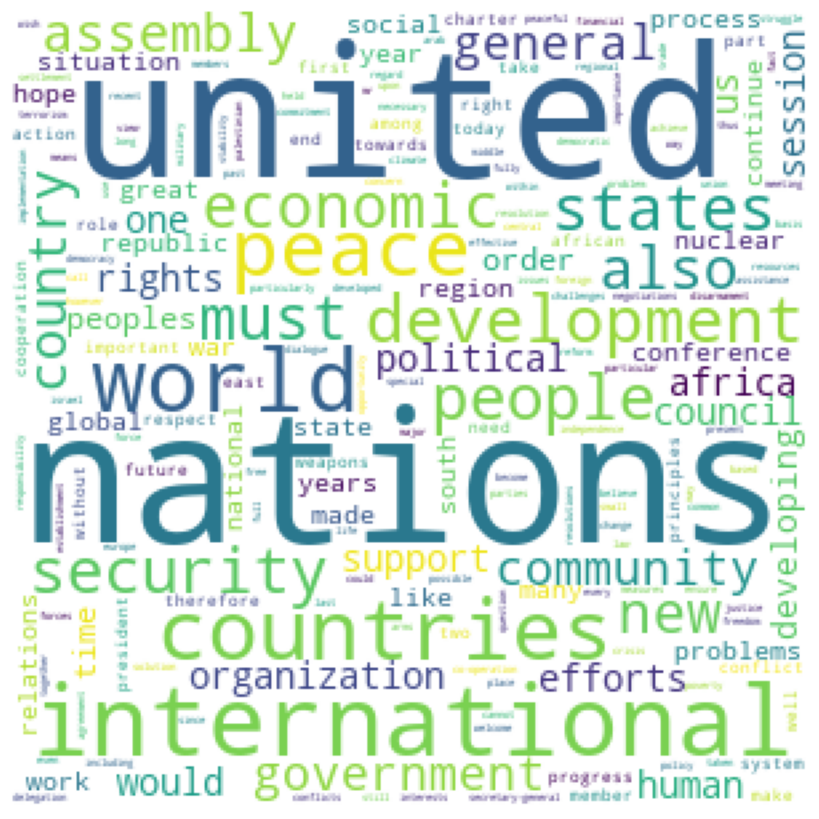

In [10]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


## TFIDF AND COMPARE

In [8]:
import numpy as np
from collections import Counter

def compute_idf(df, column='text_tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df']) + 0.1
    idf_df.index.name = 'token'
    return idf_df

# Assuming your DataFrame is named 'dataframe'
idf_df = compute_idf(dataframe)
print(idf_df.head(10))

                    df       idf
token                           
chiang              23  5.888097
vienna             814  2.321631
anti-colonialist    53  5.053299
corridors           86  4.569244
adopted           4287  0.660249
throughout        3234  0.942116
allies             624  2.587441
utilize            251  3.498138
vain               361  3.134713
higher             959  2.157700


In [9]:
# Multiply the term frequency (freq) by the inverse document frequency (idf) to calculate TF-IDF
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']

# Display the first few rows of the DataFrame with the new TF-IDF column
print(freq_df.head())

                 freq         tfidf
token                              
nations        124508  12649.986284
united         120763  12285.608632
international  117223  12364.276226
world           89421   9503.708982
countries       85734  10888.485986


## word cloud

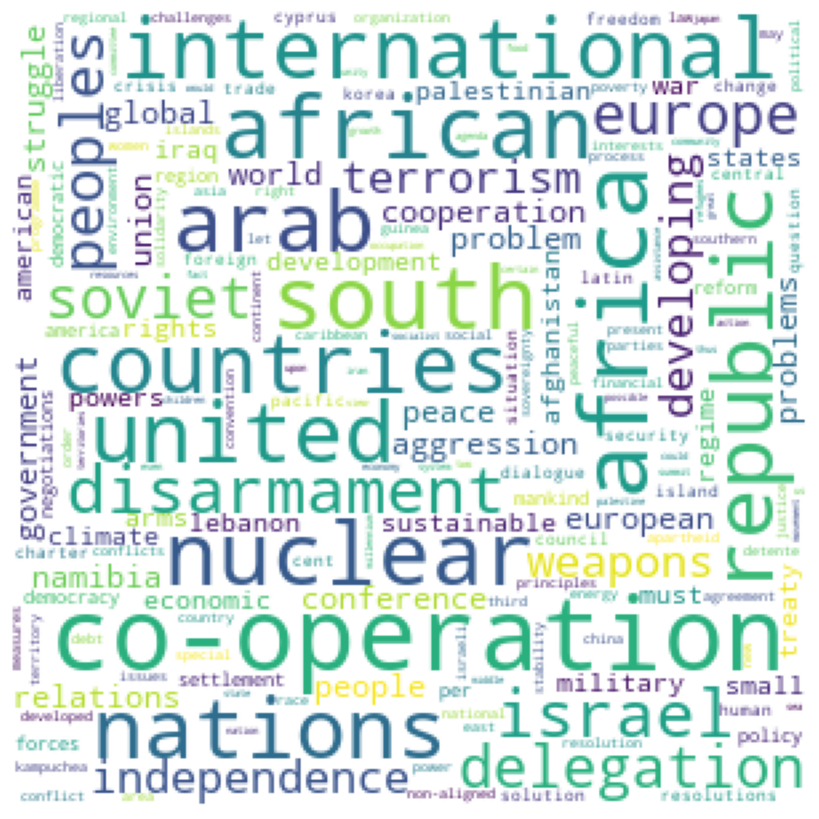

In [11]:
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


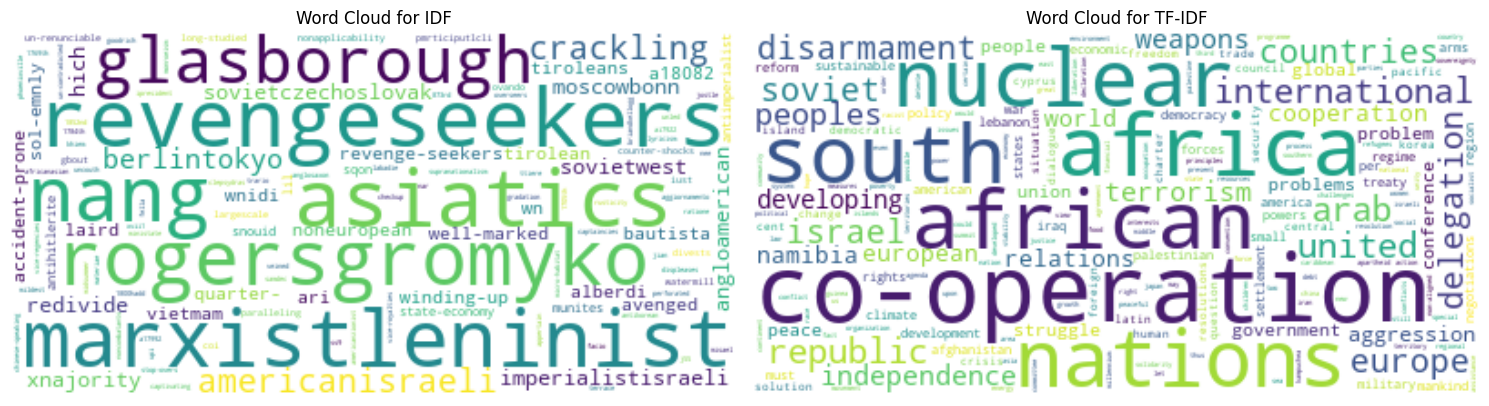

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Calculate IDF (Inverse Document Frequency) and TF-IDF (Term Frequency-Inverse Document Frequency)

# Multiply the term frequency (freq) by the inverse document frequency (idf) to calculate TF-IDF
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']

# Generate word cloud for IDF
wordcloud_idf = WordCloud(background_color='white').generate_from_frequencies(idf_df['idf'].to_dict())

# Generate word cloud for TF-IDF
wordcloud_tfidf = WordCloud(background_color='white').generate_from_frequencies(freq_df['tfidf'].to_dict())

# Display the word clouds for IDF and TF-IDF
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_idf, interpolation='bilinear')
plt.title('Word Cloud for IDF')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_tfidf, interpolation='bilinear')
plt.title('Word Cloud for TF-IDF')
plt.axis('off')
plt.tight_layout()
plt.show()

## LOADING DATA SET

In [13]:
# Import the pandas library
import pandas as pd

# Specify the file path
file = "C:/Users/shakkerar/Downloads/un-general-debates-blueprint.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file)

# Filter the DataFrame to include only rows where the 'year' column is equal to 1970
df_1970 = df[df['year'] == 1970]

# Display the first 20 rows of the filtered DataFrame
df.head(20)

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


## ACCESING DATA FRAME FOR THE YEAR 1970

In [14]:
df_1970 = df[df['year'] == 1970]

# Display the DataFrame for the year 1970
print(df_1970.head())

   session  year country country_name             speaker position  \
0       25  1970     ALB      Albania             Mr. NAS      NaN   
1       25  1970     ARG    Argentina  Mr. DE PABLO PARDO      NaN   
2       25  1970     AUS    Australia         Mr. McMAHON      NaN   
3       25  1970     AUT      Austria  Mr. KIRCHSCHLAEGER      NaN   
4       25  1970     BEL      Belgium          Mr. HARMEL      NaN   

                                                text  
0  33: May I first convey to our President the co...  
1  177.\t : It is a fortunate coincidence that pr...  
2  100.\t  It is a pleasure for me to extend to y...  
3  155.\t  May I begin by expressing to Ambassado...  
4  176. No doubt each of us, before coming up to ...  


## PRINTING STOPWORDS FOR YEAR 1970

In [15]:
import nltk
import pandas as pd

# Download NLTK stopwords corpus
#nltk.download('stopwords')

# Get stopwords for English language
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

# Specify the file path for the CSV file containing the data for the year 1970
file_path = "C:/Users/shakkerar/Downloads/un-general-debates-blueprint.csv"

# Read the CSV file into a DataFrame
df_1970 = pd.read_csv(file_path)

# Filter the DataFrame to include only rows for the year 1970
df_1970 = df[df['year'] == 1970]

# Display the DataFrame for the year 1970
print(df_1970.head())

{'he', "won't", "couldn't", "haven't", 'up', 'hers', "mustn't", 'same', 'whom', 'only', 'at', 'any', 'these', 'don', 'hasn', "isn't", 'of', 'did', 'theirs', 'you', 'all', 'until', 'further', 'am', "it's", "you've", 'there', 'some', 'yours', 'yourselves', 'themselves', 'down', "should've", 'which', 'below', 'once', 'himself', 'very', 'its', 'than', 'in', 'we', 'who', 'couldn', 'y', 'been', "that'll", 'our', "she's", 'have', 'being', "mightn't", "needn't", 'doing', 's', 'after', 'needn', 'not', 'most', 'and', 'against', 'each', 'their', 'this', 'too', "shouldn't", "wasn't", 'are', 'before', 'myself', 'by', 'ain', 'ma', 'it', 'her', 'because', 'when', 'yourself', 'him', 'then', "don't", 'off', 'own', 'those', 'between', "hadn't", "wouldn't", 'do', 'both', 're', 'an', 'she', 'into', 'few', 'does', 'm', 'over', "weren't", 'as', "didn't", 'they', 'about', 'was', 'won', 'wasn', 'itself', 'nor', "you'd", 'mustn', 'now', 'or', 'can', 'o', 'should', 'shan', 'your', 'were', 'for', 'to', 'with', '

## REMOVING STOPWORDS FOR THE YEAR 1970

In [16]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords (uncomment the line below if stopwords are not downloaded)
#nltk.download('stopwords')

# Load the CSV file into a DataFrame
file = "C:/Users/shakkerar/Downloads/un-general-debates-blueprint.csv"
df = pd.read_csv(file)

# Filter the DataFrame to include only rows for the year 1970
df_1970 = df[df['year'] == 1970].copy()

# Assuming your text column is named 'text'
text_column_name = 'text'

# Use NLTK stopwords to the 'text' column for the year 1970
stop_words = set(stopwords.words('english'))
df_1970[text_column_name] = df_1970[text_column_name].apply(
    lambda x: ' '.join([word.lower() for word in str(x).split() if word.lower() not in stop_words])
    )

# Display the modified DataFrame for the year 1970
print(df_1970.head(10))

   session  year country                     country_name             speaker  \
0       25  1970     ALB                          Albania             Mr. NAS   
1       25  1970     ARG                        Argentina  Mr. DE PABLO PARDO   
2       25  1970     AUS                        Australia         Mr. McMAHON   
3       25  1970     AUT                          Austria  Mr. KIRCHSCHLAEGER   
4       25  1970     BEL                          Belgium          Mr. HARMEL   
5       25  1970     BLR                          Belarus      Mr. GURINOVICH   
6       25  1970     BOL  Bolivia, Plurinational State of  Mr. CAMACHO OMISTE   
7       25  1970     BRA                           Brazil  Mr. GIBSON BARBOZA   
8       25  1970     CAN                           Canada           Mr. SHARP   
9       25  1970     CMR                         Cameroon          Mr. AHIDJO   

     position                                               text  
0         NaN  33: may first convey presi

## PRE-PROCESSING PIPELINE FOR THE YEAR 1970

In [17]:
import regex as re
import pandas as pd
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords corpus
#nltk.download('stopwords')

# Define tokenization function
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

# Define function to remove stopwords
def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

# Define text preparation pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Define function to prepare text
def prepare(text, pipeline, **kwargs):
    tokens = text
    for fun in pipeline:
        if fun == remove_stop:
            tokens = fun(tokens, kwargs.get('stop_words'))
        else:
            tokens = fun(tokens)
    return tokens
# Specify the name of the text column in your DataFrame
text_column_name = 'text'

# Load your DataFrame (assuming it's already loaded)
# Assuming your DataFrame is already loaded and named 'dataframe'
file = "C:/Users/shakkerar/Downloads/un-general-debates-blueprint.csv"
df = pd.read_csv(file)

# Filter the DataFrame to include only rows for the year 1970
df_1970 = df[df['year'] == 1970].copy()

# Get stopwords for English language
stop_words = set(stopwords.words('english'))

# Apply text preparation pipeline to the text column in the DataFrame for the year 1970
df_1970[text_column_name+'_tokens'] = df_1970[text_column_name].apply(prepare, pipeline=pipeline, stop_words=stop_words)

# Display the modified DataFrame for the year 1970
print(df_1970.head(10))

   session  year country                     country_name             speaker  \
0       25  1970     ALB                          Albania             Mr. NAS   
1       25  1970     ARG                        Argentina  Mr. DE PABLO PARDO   
2       25  1970     AUS                        Australia         Mr. McMAHON   
3       25  1970     AUT                          Austria  Mr. KIRCHSCHLAEGER   
4       25  1970     BEL                          Belgium          Mr. HARMEL   
5       25  1970     BLR                          Belarus      Mr. GURINOVICH   
6       25  1970     BOL  Bolivia, Plurinational State of  Mr. CAMACHO OMISTE   
7       25  1970     BRA                           Brazil  Mr. GIBSON BARBOZA   
8       25  1970     CAN                           Canada           Mr. SHARP   
9       25  1970     CMR                         Cameroon          Mr. AHIDJO   

     position                                               text  \
0         NaN  33: May I first convey to

## RUN THE PIPELINE FOR THE YEAR 1970

In [18]:
import regex as re
import pandas as pd
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords corpus
# nltk.download('stopwords')

# Define tokenization function
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

# Define function to remove stopwords
def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

# Define text preparation pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Define function to prepare text
def prepare(text, pipeline, **kwargs):
    tokens = text
    for fun in pipeline:
        if fun == remove_stop:
            tokens = fun(tokens, kwargs.get('stop_words'))
        else:
            tokens = fun(tokens)
            return tokens

# Specify the name of the text column in your DataFrame
text_column_name = 'text'

# Load your DataFrame (assuming it's already loaded)
# Assuming your DataFrame is already loaded and named 'dataframe'
file = "C:/Users/shakkerar/Downloads/un-general-debates-blueprint.csv"
df = pd.read_csv(file)

# Filter the DataFrame to include only rows for the year 1970
df_1970 = df[df['year'] == 1970].copy()

# Get stopwords for English language
stop_words = set(stopwords.words('english'))

# Apply text preparation pipeline to the text column in the DataFrame for the year 1970
df_1970[text_column_name+'_tokens'] = df_1970[text_column_name].apply(prepare, pipeline=pipeline, stop_words=stop_words)
# Display the modified DataFrame for the year 1970
print(df_1970.head(10))

   session  year country                     country_name             speaker  \
0       25  1970     ALB                          Albania             Mr. NAS   
1       25  1970     ARG                        Argentina  Mr. DE PABLO PARDO   
2       25  1970     AUS                        Australia         Mr. McMAHON   
3       25  1970     AUT                          Austria  Mr. KIRCHSCHLAEGER   
4       25  1970     BEL                          Belgium          Mr. HARMEL   
5       25  1970     BLR                          Belarus      Mr. GURINOVICH   
6       25  1970     BOL  Bolivia, Plurinational State of  Mr. CAMACHO OMISTE   
7       25  1970     BRA                           Brazil  Mr. GIBSON BARBOZA   
8       25  1970     CAN                           Canada           Mr. SHARP   
9       25  1970     CMR                         Cameroon          Mr. AHIDJO   

     position                                               text  \
0         NaN  33: May I first convey to

## COUNTING THE TOKENS FOR THE YEAR 1970

In [22]:
from collections import Counter

# Assuming 'text_tokens' is the column containing tokenized text
counter = Counter()
df_1970['text_tokens'].map(counter.update)

freq_df_1970 = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df_1970 = freq_df_1970.query('freq >= 1')
freq_df_1970.index.name = 'token'
freq_df_1970 = freq_df_1970.sort_values('freq', ascending=False)

# Display the top 10 frequent tokens for the year 1970
print(freq_df_1970.head(10))

         freq
token        
       271673
e      176467
t      139896
i      111820
o      110558
a      109050
n      108917
s       86906
r       82825
h       64470


In [ ]:
## TFIDF AND COMPARE FOR THE YEAR 1970